In [1]:
from pyoculus.problems import AnalyticCylindricalBfield
from pyoculus.solvers import PoincarePlot, FixedPoint, Manifold
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
separatrix = {"type": "circular-current-loop", "amplitude": -10, "R": 6, "Z": -5.5}
maxwellboltzmann = {"m": 6, "n": -1, "d": np.sqrt(2), "type": "maxwell-boltzmann", "amplitude": 1e-1}

# Creating the pyoculus problem object, adding the perturbation here use the R, Z provided as center point
pyoproblem = AnalyticCylindricalBfield.without_axis(
    6,
    0,
    0.91,
    0.6,
    perturbations_args=[separatrix],
    Rbegin=1,
    Rend=8,
    niter=800,
    guess=[6.41, -0.7],
    tol=1e-9,
)

# # Adding perturbation after the object is created uses the found axis as center point
pyoproblem.add_perturbation(maxwellboltzmann)

### Finding the X-point
print("\nFinding the X-point\n")

# set up the integrator for the FixedPoint
iparams = dict()
iparams["rtol"] = 1e-13

pparams = dict()
pparams["nrestart"] = 0
pparams["niter"] = 300

# set up the FixedPoint object
fixedpoint = FixedPoint(pyoproblem, pparams, integrator_params=iparams)

# find the X-point
guess = [6.21560891, -4.46981856]
print(f"Initial guess: {guess}")

fixedpoint.compute(guess=guess, pp=0, qq=1, sbegin=4, send=9, tol=1e-10)

if fixedpoint.successful:
    results = [list(p) for p in zip(fixedpoint.x, fixedpoint.y, fixedpoint.z)]
else:
    raise ValueError("X-point not found")

# Set up the manifold
iparams = dict()
iparams["rtol"] = 1e-13
manifold = Manifold(fixedpoint, pyoproblem, integrator_params=iparams)

# Choose the tangles to work with
manifold.choose(0, 0)

0 - dr : 0.010422282084043258
1 - RZ : [ 6.41409394 -0.69368043]
1 - dr : 6.293042617255254e-06
2 - RZ : [ 6.41409781 -0.69367863]
2 - dr : 9.776471937205409e-12
0 - dr : 9.776471937205409e-12

Finding the X-point

Initial guess: [6.21560891, -4.46981856]
0 - [DeltaR, DeltaZ] : [0.37061925 0.29572031] - dtheta : 0.10193215420124901
0 - [StepR, StepZ]: [-0.0234823  -0.02119928]
1 - RZ : [ 6.19212661 -4.49101784] - rhotheta : [ 3.80382127 -1.62918429]
1 - [DeltaR, DeltaZ] : [-0.1651057  -0.17691821] - dtheta : 0.03870184501450491
1 - [StepR, StepZ]: [0.00515258 0.00348819]
2 - RZ : [ 6.19727919 -4.48752965] - rhotheta : [ 3.80004156 -1.62788424]
2 - [DeltaR, DeltaZ] : [-0.01794846 -0.03057362] - dtheta : 0.004221405063145722
2 - [StepR, StepZ]: [ 0.00628992 -0.00868501]
3 - RZ : [ 6.20356912 -4.49621466] - rhotheta : [ 3.80835957 -1.6261052 ]
3 - [DeltaR, DeltaZ] : [0.00043682 0.00019993] - dtheta : 0.00011163054962337604
3 - [StepR, StepZ]: [ 6.34979259e-05 -1.46029593e-04]
4 - RZ : [ 6

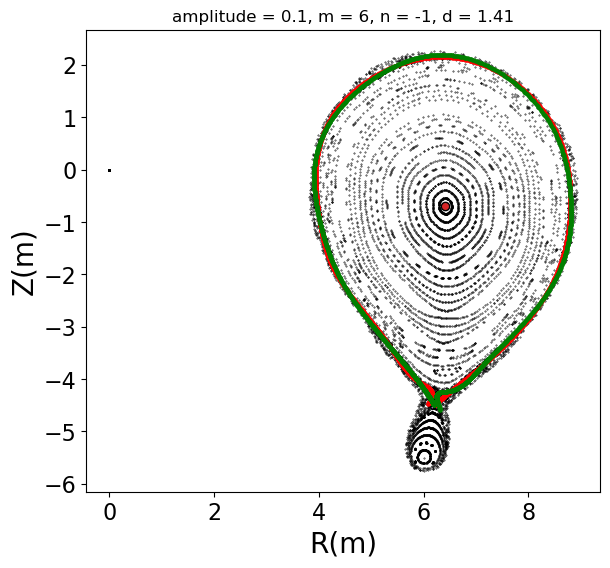

In [159]:
fig = pickle.load(open("manifold_05131749.pkl", "rb"))
ax = fig.gca()

In [69]:
eps_s_lb = manifold.find_epsilon(manifold.rfp_s, manifold.vector_s, direction=-1)
eps_u_lb = manifold.find_epsilon(manifold.rfp_u, manifold.vector_u)

2024-05-20 02:38:47 [info     ] Search for minimum of the linear error succeeded, epsilon = 2.05960e-07
2024-05-20 02:38:47 [info     ] Search for minimum of the linear error succeeded, epsilon = 3.03587e-07


In [70]:
bounds = manifold.find_bounds(eps_s_lb, eps_u_lb)

In [71]:
n_s, n_u = manifold.find_N(eps_s_lb, eps_u_lb)
print(n_s, n_u)

7 7


In [91]:
bounds[1]

(3.035869220114105e-07, 8.681123851612285e-06)

In [154]:
space_u = np.logspace(
            np.log(bounds[1][0]) / np.log(manifold.lambda_u),
            np.log(bounds[1][1]) / np.log(manifold.lambda_u),
            20,
            base=manifold.lambda_u,
        )

space_s = np.logspace(
            np.log(bounds[0][0]) / np.log(manifold.lambda_s),
            np.log(bounds[0][1]) / np.log(manifold.lambda_s),
            20,
            base=manifold.lambda_s,
        )

In [155]:
r_u = []
r_s = []
for eps in space_u:
    r_u.append(manifold.integrate_single(manifold.rfp_u + eps * manifold.vector_u, 7, 1, ret_jacobian=False))
for eps in space_s:
    r_s.append(manifold.integrate_single(manifold.rfp_s + eps * manifold.vector_s, 6, -1, ret_jacobian=False))

r_u = np.array(r_u)
r_s = np.array(r_s)

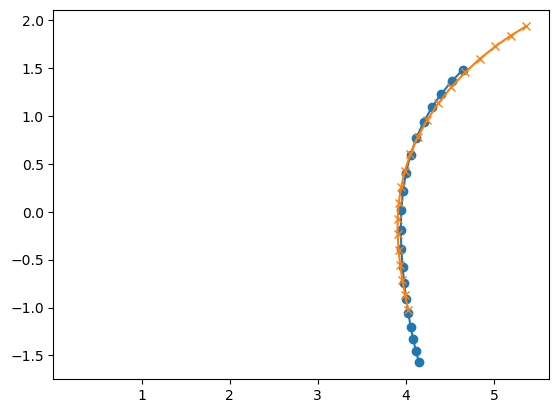

In [156]:
ax.plot(r_u[:, 0], r_u[:, 1], 'o-')
ax.plot(r_s[:, 0], r_s[:, 1], 'x-')
fig

In [148]:
n_s, n_u = 6, 7
def evolution(self, eps):
    print(eps)
    eps_s, eps_u = eps
    r_s = self.rfp_s + eps_s * self.vector_s
    r_u = self.rfp_u + eps_u * self.vector_u

    try:
        r_s_evolved = self.integrate_single(r_s, n_s, -1, ret_jacobian = False)
    except Exception as e:
        print(f"Error in stable manifold integration : {e}")

    try:
        r_u_evolved = self.integrate_single(r_u, n_u, 1, ret_jacobian = False)
    except Exception as e:
        print(f"Error in unstable manifold integration : {e}")

    return r_s_evolved - r_u_evolved

es, eu = np.meshgrid(space_s, space_u)
E = np.array([evolution(manifold, [S, U]) for S, U in zip(es.flatten(), eu.flatten())]).reshape(es.shape + (2,))

[2.0595969838639021e-07, 3.0358692201141047e-07]
[2.2445180403006364e-07, 3.0358692201141047e-07]
[2.446042246470832e-07, 3.0358692201141047e-07]
[2.6656603173118985e-07, 3.0358692201141047e-07]
[2.9049968117041193e-07, 3.0358692201141047e-07]
[3.165822149658279e-07, 3.0358692201141047e-07]
[3.450065708467213e-07, 3.0358692201141047e-07]
[3.759830094696313e-07, 3.0358692201141047e-07]
[4.0974066975856343e-07, 3.0358692201141047e-07]
[4.4652926389152874e-07, 3.0358692201141047e-07]
[4.866209244715639e-07, 3.0358692201141047e-07]
[5.303122175461357e-07, 3.0358692201141047e-07]
[5.779263363656158e-07, 3.0358692201141047e-07]
[6.298154921085254e-07, 3.0358692201141047e-07]
[6.863635192582031e-07, 3.0358692201141047e-07]
[7.479887149033958e-07, 3.0358692201141047e-07]
[8.15146932965649e-07, 3.0358692201141047e-07]
[8.883349562421129e-07, 3.0358692201141047e-07]
[9.680941712074553e-07, 3.0358692201141047e-07]
[1.0550145727580902e-06, 3.0358692201141047e-07]
[1.1497391285226698e-06, 3.0358692

In [149]:
N = np.linalg.norm(E, axis=2)

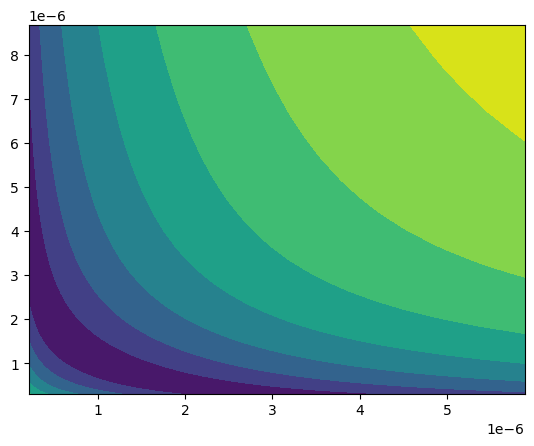

In [153]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot()
ax.contourf(es, eu, N)

# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(es, eu, N, cmap='viridis')

plt.show()

In [175]:
n_s = 7
n_u = 7

def iteration(eps_u):
    r_s_E, intA = manifold.integrate_single(manifold.rfp_u + eps_u * manifold.vector_u, n_s+n_u-1, 1, ret_jacobian=False, integrate_A=True)
    ax.scatter(*r_s_E, s=15, edgecolor='black', zorder=10)
    # r_dir = r_s_E - manifold.rfp_s
    # r_dir = r_dir / np.linalg.norm(r_dir)
    return intA

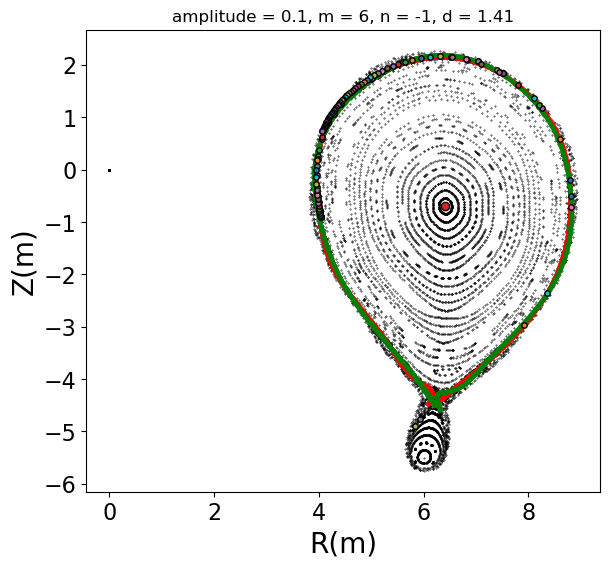

In [172]:
fig

In [176]:
space = np.linspace(bounds[1][0], bounds[1][1], 100)

In [186]:
arr = []
for eps in space_u:
    arr.append(iteration(eps))

print(np.abs(arr))

[59.06072248 62.26544128 63.44226072 61.9223951  56.3250052  51.05695202
 63.78440941 75.05580689 75.60228961 75.74015315 75.96458521 75.99602105
 75.78675995 75.50069015 74.44564879 53.17695928 72.85440247 80.86032045
 84.96483967 86.68644786]


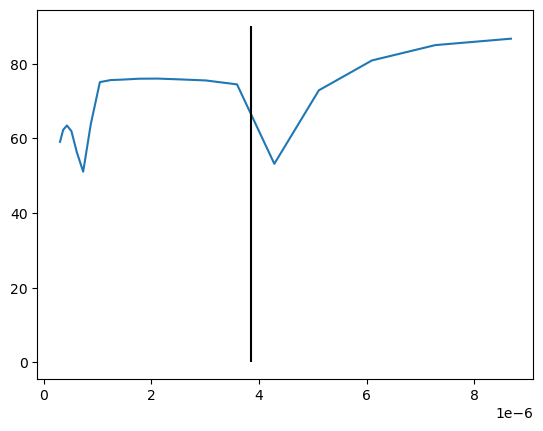

In [188]:
plt.plot(space_u, np.abs(arr))
plt.vlines(3.84907705931755e-06, 0, 90, color='black')

In [178]:
manifold.integrate_single(manifold.rfp_s, 1, 1, ret_jacobian=False, integrate_A=True)

(array([ 6.20363263, -4.49636071]), 12.426101796891468)

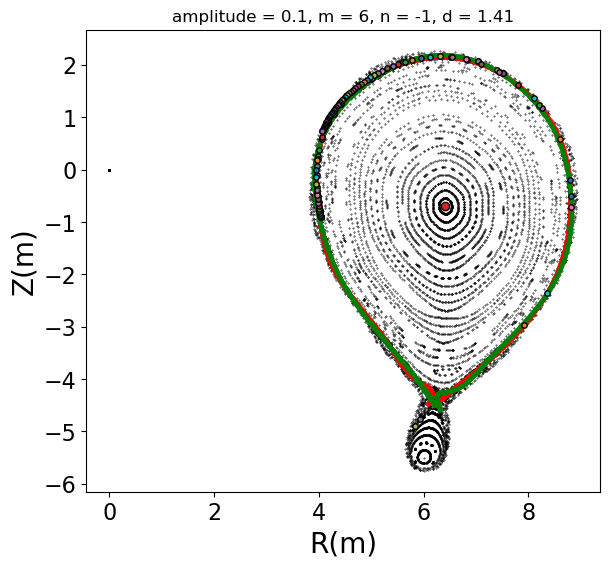

In [169]:
fig

In [20]:
r_dir

array([-2.24458991,  4.80085126])

In [ ]:
fund = manifold.fundamental_segment

In [ ]:
fig = pickle.load(open("manifold_05131749.pkl", "rb"))
ax = fig.gca()

In [ ]:
marker = ["X", "o", "s", "p", "P", "*", "x", "D", "d", "^", "v", "<", ">"]
for i, clinic in enumerate(manifold.clinics):
    eps_s_i, eps_u_i = clinic[1:3]

    n_s, n_u = 6, 6 
    
    hs_i = manifold.integrate(manifold.rfp_s + eps_s_i * manifold.vector_s, n_s, -1)
    hu_i = manifold.integrate(manifold.rfp_u + eps_u_i * manifold.vector_u, n_u, 1)
    ax.scatter(hs_i[0,-1], hs_i[1,-1], marker=marker[i], color="purple", edgecolor='cyan', zorder=10)
    ax.scatter(hu_i[0,-1], hu_i[1,-1], marker=marker[i], color="royalblue", edgecolor='cyan', zorder=10, label=f'$h_{i+1}$')

In [ ]:
fig

In [ ]:
rh = manifold.integrate_single(manifold.rfp_u + manifold.clinics[1][0]*manifold.vector_u, 3, 1, ret_jacobian=False)

In [ ]:
default = {
    "markersize": 2,
    "fmt": "-x",
    "colors": ["red", "blue"],
}

area_calc = []
dirdict = [manifold.unstable["+"], manifold.stable["+"]]

for i, out in enumerate(dirdict):
    tmpcolor = default["colors"][i]
    
    if i == 0:
        area_calc.append(out[:, 3])
        out = out[:, 3]
    else:
        area_calc.append(out[:, 9])
        out = out[:, 9]

    out = out.T.flatten()

    if i==0:
        out = np.concatenate((rh, out))
    else:
        out = np.concatenate((out, rh))

    ax.plot(
        out[::2],
        out[1::2],
        default["fmt"],
        color='black',
        markersize=6,
        linewidth=2
    )

In [ ]:
# Concatenate the paths to form a loop
loop = np.vstack((path1[1:], path2[1:]))

x = loop[:, 0]
y = loop[:, 1]
area = 0.5*np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

In [ ]:
ax.scatter(6.7913, -4.0464, color='black', label='$B^\phi$ evaluation point')

In [ ]:
ax.legend()
ax.set_xlim(6, 7.3)
ax.set_ylim(-4.6, -3.6)
fig

In [ ]:
pickle.dump(fig, open("perturbed-6-1-0.1-closeup.pkl", "wb"))

In [ ]:
pyoproblem.B([6.7913, 0., -4.0464])

In [ ]:
flux1 = area * pyoproblem.B([6.7913, 0., -4.0464])[1] * 6.7913
flux1

#### Area by computation

In [ ]:
manifold.resonance_area()

In [ ]:
manifold.areas

In [ ]:
(flux1 - manifold.areas[0])/flux1